In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
import os

Executando inferência em: 00003604_in.jpg

image 1/1 /content/drive/MyDrive/dataset/images/test/00003604_in.jpg: 480x640 1 1_habilitacao, 1 categoria, 1 cpf, 1 d_nascimento, 3 doc_ident-emissor-ufs, 2 filiacaos, 1 n_registro, 1 nome, 1 validade, 1 espelho, 170.3ms
Speed: 5.1ms preprocess, 170.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Executando inferência em: 00003605_in.jpg

image 1/1 /content/drive/MyDrive/dataset/images/test/00003605_in.jpg: 448x640 1 1_habilitacao, 1 categoria, 1 cpf, 1 d_nascimento, 3 doc_ident-emissor-ufs, 4 filiacaos, 1 n_registro, 1 nome, 1 validade, 1 espelho, 152.0ms
Speed: 3.3ms preprocess, 152.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Executando inferência em: 00003606_in.jpg

image 1/1 /content/drive/MyDrive/dataset/images/test/00003606_in.jpg: 448x640 1 1_habilitacao, 1 categoria, 1 cpf, 1 d_nascimento, 3 doc_ident-emissor-ufs, 3 filiacaos, 1 n_registro, 1 nome, 1 validade, 1 espelho, 153.7ms
Speed: 3.

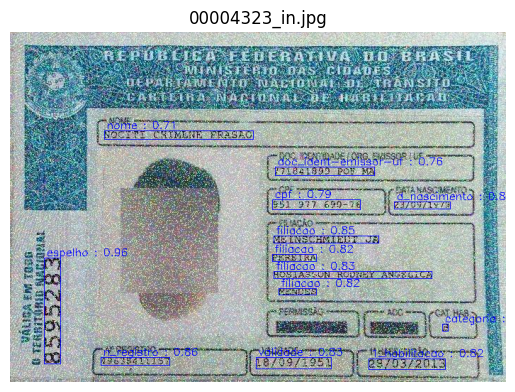

In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import random
from PIL import Image
from collections import defaultdict

model = YOLO('/content/drive/MyDrive/dataset/best.pt')

test_set_loc = '/content/drive/MyDrive/dataset/images/test/'
output_crop_dir = '/content/drive/MyDrive/crops_Yolo/'


os.makedirs(output_crop_dir, exist_ok=True)

def checkClass(name):
    if name == '1_habilitacao':
        return 0
    elif name == 'categoria':
        return 1
    elif name == 'cpf':
        return 2
    elif name == 'd_nascimento':
        return 3
    elif name == 'doc_ident-emissor-uf':
        return 4
    elif name == 'filiacao':
        return 5
    elif name == 'n_registro':
        return 6
    elif name == 'nome':
        return 7
    elif name == 'validade':
        return 8
    elif name == 'espelho':
        return 9
    elif name == 'permissao':
        return 10
    elif name == 'acc':
        return 11
    else:
        return -1

def plot_and_crop_bboxes(results, image_path):
    img = results[0].orig_img
    img_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    names = results[0].names
    scores = results[0].boxes.conf.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

    base_name = os.path.splitext(os.path.basename(image_path))[0].replace('_in', '')
    output_dir = os.path.join(output_crop_dir, base_name)
    os.makedirs(output_dir, exist_ok=True)

    detections = []
    for score, cls, bbox in zip(scores, classes, boxes):
        class_label = names[int(cls)]
        class_id = checkClass(class_label)
        if class_id == -1:
            continue

        detections.append({
            'score': score,
            'class_label': class_label,
            'class_id': class_id,
            'bbox': bbox
        })

    grouped = defaultdict(list)
    for det in detections:
        grouped[det['class_id']].append(det)

    for class_id in grouped:
        grouped[class_id].sort(key=lambda d: d['bbox'][0])

    output_img_rgb = img_rgb.copy()

    for class_id, det_list in grouped.items():
        for i, det in enumerate(det_list):
            score = det['score']
            class_label = det['class_label']
            bbox = det['bbox']

            x_min, y_min, x_max, y_max = bbox
            left = max(x_min - 5, 0)
            top = max(y_min - 2, 0)
            right = min(x_max + 2, img.shape[1])
            bottom = min(y_max + 2, img.shape[0])

            crop = img[top:bottom, left:right]

            cropped_image = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

            if class_id == 9:
                cropped_image = cropped_image.rotate(270, expand=True)

            save_path = os.path.join(output_dir, f"{class_id}.{i+1}.jpg")
            cropped_image.save(save_path)

            output_img_rgb = cv2.rectangle(output_img_rgb, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0,0,255), 1)
            label = f"{class_label} : {score:.2f}"
            cv2.putText(output_img_rgb, label, (bbox[0]+3, bbox[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    return output_img_rgb

for filename in os.listdir(test_set_loc):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_set_loc, filename)
        print("Executando inferência em:", filename)

        results = model(image_path, conf=0.5, iou=0.1)
        img_with_boxes = plot_and_crop_bboxes(results, image_path)

        plt.imshow(img_with_boxes)
        plt.axis('off')
        plt.title(filename)
        # plt.show()

A saída de streaming foi truncada nas últimas 5000 linhas.
Save image: 6.1.jpg
Save image: 1.1.jpg
Executando inferência em: 00004036_in.jpg

image 1/1 /content/drive/MyDrive/dataset/images/test/00004036_in.jpg: 480x640 1 1_habilitacao, 1 categoria, 1 cpf, 1 d_nascimento, 3 doc_ident-emissor-ufs, 4 filiacaos, 1 n_registro, 1 nome, 1 validade, 1 espelho, 156.3ms
Speed: 3.4ms preprocess, 156.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Save image: 5.1.jpg
Save image: 5.2.jpg
Save image: 5.3.jpg
Save image: 5.4.jpg
Save image: 2.1.jpg
Save image: 3.1.jpg
Save image: 6.1.jpg
Save image: 0.1.jpg
Save image: 8.1.jpg
Save image: 7.1.jpg
Save image: 9.1.jpg
Save image: 1.1.jpg
Save image: 4.1.jpg
Save image: 4.2.jpg
Save image: 4.3.jpg
Executando inferência em: 00004037_in.jpg

image 1/1 /content/drive/MyDrive/dataset/images/test/00004037_in.jpg: 448x640 1 1_habilitacao, 1 categoria, 1 cpf, 1 d_nascimento, 1 doc_ident-emissor-uf, 4 filiacaos, 1 n_registro, 1 nome, 1 val

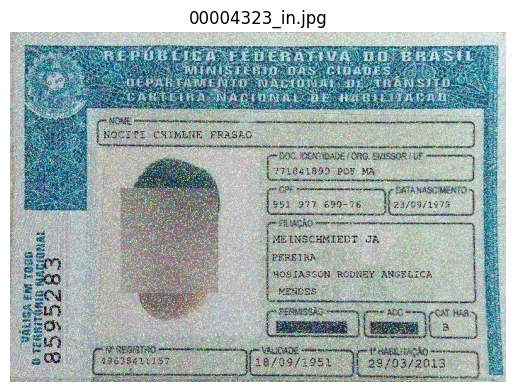

In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import random
from PIL import Image

model = YOLO('/content/drive/MyDrive/dataset/best.pt')

test_set_loc = '/content/drive/MyDrive/dataset/images/test/'
output_base_dir = '/content/drive/MyDrive/crops_Yolo/'

os.makedirs(output_base_dir, exist_ok=True)

def checkClass(name):
    if name == '1_habilitacao':
        return 0
    elif name == 'categoria':
        return 1
    elif name == 'cpf':
        return 2
    elif name == 'd_nascimento':
        return 3
    elif name == 'doc_ident-emissor-uf':
        return 4
    elif name == 'filiacao':
        return 5
    elif name == 'n_registro':
        return 6
    elif name == 'nome':
        return 7
    elif name == 'validade':
        return 8
    elif name == 'espelho':
        return 9
    elif name == 'permissao':
        return 10
    elif name == 'acc':
        return 11
    else:
        return -1


def plot_and_crop_bboxes(results, image_path):
    img = results[0].orig_img
    img_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    names = results[0].names
    scores = results[0].boxes.conf.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

    base_name = os.path.splitext(os.path.basename(image_path))[0]
    output_dir = os.path.join(output_base_dir, base_name)

    detections = []
    for score, cls, bbox in zip(scores, classes, boxes):
        class_label = names[int(cls)]
        class_id = checkClass(class_label)
        if class_id == -1:
            continue
        detections.append({
            'score': score,
            'class_label': class_label,
            'class_id': class_id,
            'bbox': bbox
        })

    from collections import defaultdict
    grouped = defaultdict(list)
    for det in detections:
        grouped[det['class_id']].append(det)

    for class_id in grouped:
      if class_id == 5:
          grouped[class_id].sort(key=lambda d: d['bbox'][1])
      else:
          grouped[class_id].sort(key=lambda d: d['bbox'][0])


    output_img_rgb = img_rgb.copy()

    for class_id, det_list in grouped.items():
        for i, det in enumerate(det_list):
            score = det['score']
            class_label = det['class_label']
            bbox = det['bbox']

            x_min, y_min, x_max, y_max = bbox
            left = max(x_min - 5, 0)
            top = max(y_min - 2, 0)
            right = min(x_max + 2, img.shape[1])
            bottom = min(y_max + 2, img.shape[0])

            crop = img[top:bottom, left:right]

            suffix = f"{i+1}"
            file_name = f"{class_id}.{suffix}.jpg"
            image = Image.open(image_path)


            cropped_image = image.crop((left, top, right, bottom))
            if class_id == 9:
                cropped_image = cropped_image.rotate(270, expand=True)
            print(f"Save image: {file_name}")

            final_output_dir = output_dir.replace('_in', '')
            os.makedirs(final_output_dir, exist_ok=True)
            cropped_image.save(os.path.join(final_output_dir, f'{file_name}'))

    return output_img_rgb


for filename in os.listdir(test_set_loc):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_set_loc, filename)
        print("Executando inferência em:", filename)

        results = model(image_path, conf=0.5, iou=0.1)
        img_with_boxes = plot_and_crop_bboxes(results, image_path)

        plt.imshow(img_with_boxes)
        plt.axis('off')
        plt.title(filename)
        # plt.show()
